In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D

In [2]:
X,Y = make_circles(n_samples=500,noise=0.02)

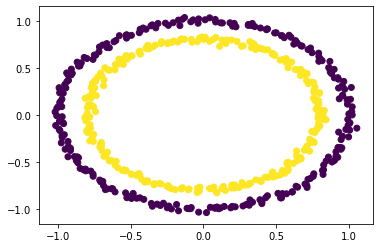

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y,marker='o')
#c means color


The dataset is clearly a non-linear dataset and consists of two features (say, X and Y).
In order to use SVM for classifying this data, 
introduce another feature Z = X2 + Y2 into the dataset. 
Thus, projecting the 2-dimensional data into 3-dimensional space.
The first dimension representing the feature X, second representing Y 
and third representing Z (which, mathematically, 
is equal to the radius of the circle of which the point (x, y) is a part of). Now, clearly, for the data shown above, the ‘yellow’ data points belong to a circle of smaller radius and the ‘purple’ data points belong to a circle of larger radius. Thus, the data becomes linearly separable along the Z-axis.


In [4]:
X1 = X[:, 0].reshape((-1, 1)) 
X2 = X[:, 1].reshape((-1, 1)) 
X3 = (X1**2 + X2**2) 
X = np.hstack((X, X3))  # basically concatenating X3 in X horizontal wise

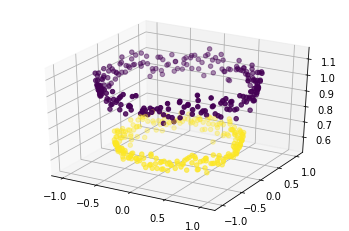

In [5]:
fig = plt.figure()
axes = fig.add_subplot(111,projection = '3d')
axes.scatter(X1, X2, X1**2 + X2**2, c=Y, depthshade = True)

In [6]:
from sklearn import svm

In [7]:
svc = svm.SVC(kernel = 'linear') 
svc.fit(X, Y) 
w = svc.coef_ 
b = svc.intercept_ 

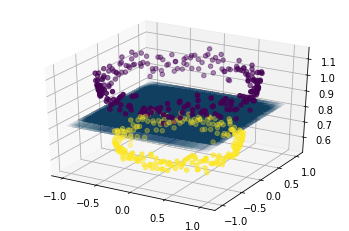

In [8]:
# plotting the separating hyperplane 
x1 = X[:, 0].reshape((-1, 1)) 
x2 = X[:, 1].reshape((-1, 1)) 
x1, x2 = np.meshgrid(x1, x2) 
x3 = -(w[0][0]*x1 + w[0][1]*x2 + b) / w[0][2] 
  
fig = plt.figure() 
axes2 = fig.add_subplot(111, projection = '3d') 
axes2.scatter(X1, X2, X1**2 + X2**2, c = Y, depthshade = True) 
axes1 = fig.gca(projection = '3d') 
axes1.plot_surface(x1, x2, x3, alpha = 0.01) 
plt.show() 